* * *
<pre> NYU Paris            <i> Artificial intelligence - Fall 2022 </i></pre>
* * *


<h1 align="center"> Lab 11: Graphs and networks in machine learning  </h1>

<pre align="left"> November 10th 2022               <i> Author: Hicham Janati </i></pre>
* * *





# Part I: Introduction to Networkx

Networks (or graphs) are a very powerful tool through which one can model relationships and structure data with a lot of flexibility. A graph is a collection of nodes (elements of some set) that may or may not be connected by an edge. The purpose of this first section is to get familiar with manipulating graphs using Networkx. We start with a simple examples of the parisian subway:
![metro](https://aiteachings.github.io/NYU-AI-Fall23/static_files/data/got/metro.png)


In [2]:
%matplotlib inline
import networkx as nx
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

### Question 1
Read and run the following code multiple times. What do you notice ?

In [ ]:
#two different nodes linked by an edge


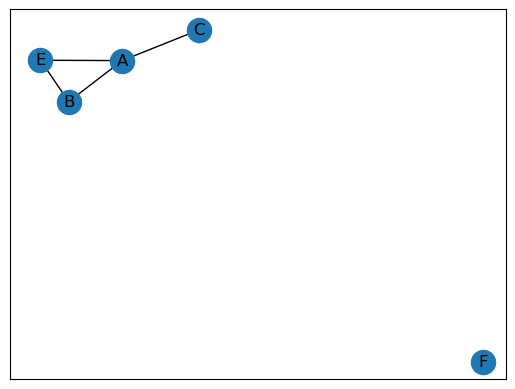

In [3]:
G = nx.Graph()

G.add_edge("A", "B", somedata=1, value1=300, name="link")
G.add_node("F")
G.add_edge("C", "A", somedata=1)
G.add_edge("E", "A", somedata=10)
G.add_edge("E", "B", somedata=1)

nx.draw_networkx(G)

In [ ]:
#What do you notice:
#It is random. Distance between nodes are random, not proportional, 
#everything is random

### Question 2
We can add any data to an edge by appending keywords like this:

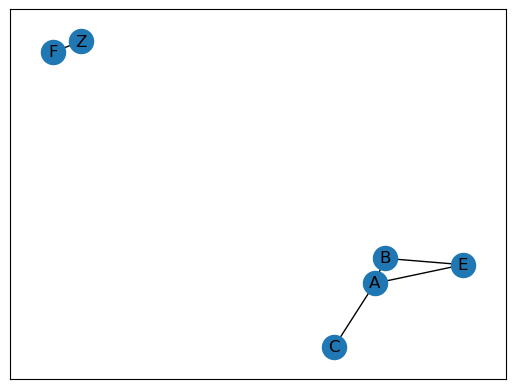

In [4]:
G.add_edge("F", "Z", weight=15., somedata=403, someotherdata="somevalue", eleke=4404.)
G.add_edge("A", "B", weight=10., somedata=300, someotherdata="someothervalue")

nx.draw_networkx(G)

This additional data can be obtained from the edge:

In [5]:
G.get_edge_data("F", "Z")

{'weight': 15.0,
 'somedata': 403,
 'someotherdata': 'somevalue',
 'eleke': 4404.0}

As well as for all the edges and a specific variable:

In [6]:
nx.get_edge_attributes(G, "somedata")

{('A', 'B'): 300,
 ('A', 'C'): 1,
 ('A', 'E'): 10,
 ('B', 'E'): 1,
 ('F', 'Z'): 403}

Create a graph `M` where the nodes are the stations in the image above (you can ignore Line 12 for the sake of simplicity). Add a `time` and `distance` variables for all edges using the time (mn) and distance (meters) conventions:
- metro change: 1 | 100
- metro-metro: 2 | 1500
- RER-RER: 2 | 2000
- RER change: 4 | 200


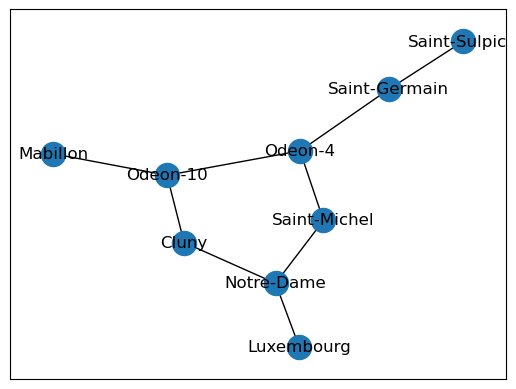

In [7]:
M = nx.Graph()


M.add_edge("Saint-Michel", "Odeon-4", time=2, distance=1500, color="purple")
M.add_edge("Saint-Michel", "Notre-Dame", time=4, distance=200, color="black")
M.add_edge("Cluny", "Odeon-10", time=2, distance=1500)
M.add_edge("Odeon-10", "Mabillon", time=2, distance=1500)
M.add_edge("Notre-Dame", "Cluny", time=4, distance=200)
M.add_edge("Notre-Dame", "Luxembourg", time=2, distance=2000)
M.add_edge("Saint-Germain", "Odeon-4", time=2, distance=1500)
M.add_edge("Odeon-4", "Odeon-10", time=1, distance=100)
M.add_edge("Saint-Germain", "Saint-Sulpice", time=2, distance=1500)
#colors=[M[u][v]["color"] for u,v in M.edges()]



nx.draw_networkx(M)

### Question 3
The function `nx.shortest_path` provides the list of nodes that constitute the shortest path between two given nodes:

In [25]:
nx.shortest_path(G, "E", "C")

['E', 'A', 'C']

In [26]:
nx.shortest_path_length(G, "E", "C")

2

Compute the shortest path (and its length) between "Saint-Germain" and "Clunny". Check the documentation of these functions to select the appropriate criterion. Is the shortest path in time and distance the same ?


In [27]:
nx.shortest_path(M, "Saint-Germain", "Cluny")

['Saint-Germain', 'Odeon-4', 'Odeon-10', 'Cluny']

In [28]:
nx.shortest_path_length(M, "Saint-Germain", "Cluny")

3

### Question 4
To draw the graph with edge lengths respecting the given data, you need to first generate node positions using the data:

In [ ]:
G = nx.Graph()

G.add_edge("A", "B", somedata=10, somedata_inv=1/10.)
G.add_edge("A", "C", somedata=1, somedata_inv=1.)

positions = nx.spring_layout(G, weight="somedata_inv")
nx.draw_networkx(G, positions)

Draw the metro graph with both criteria.  You can add edge labels (with your data attribute) using: `nx.draw_networkx_edge_labels` as shown below. Does the shortest path make sense visually ? Propose an idea to fix the counter-intuitive displayed labeling.

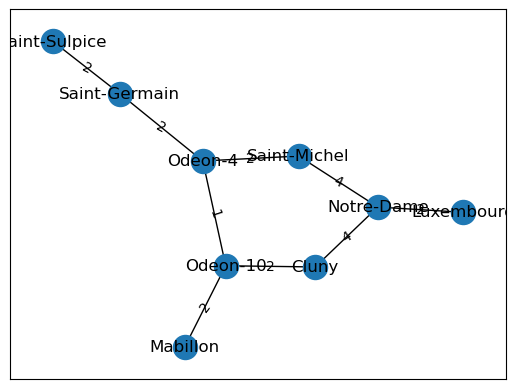

In [31]:
positions=nx.spring_layout(M, weight="closeness")
edge_data=nx.get_edge_attributes(M,"time")
nx.draw_networkx_edge_labels(M, positions, edge_data)
nx.draw_networkx(M, positions)

In [ ]:
'''
Answer:
No the shortest path doesn't make sense visually because the shortest path has a value of 1 and it is the same
visual length as one of value 2 and even longer than one of value 4.
To fix this, I can consider adjusting the edge lengths in the visualization to better represent the path lengths. 
I can also 
'''

# Part II: graph clustering

We start by introducing two concepts:

### A)  - Betweeness centrality
The shortest path between nodes can be used to define the concept (quantity) of betweeness centrality of an edge. An edge has high _betweeness centrality_ if among all possible shortest paths between _all_ the nodes of the graph
a large proportion includes it. Consider the case of a network with two islands linked by a bridge. The edge conssituting the bridge would be present in any shortest path between nodes from different islands:

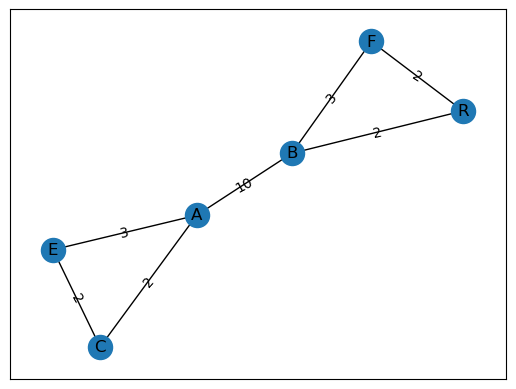

In [21]:
G = nx.Graph()

G.add_edge("A", "B", somedata=10)
G.add_edge("A", "C", somedata=2)

G.add_edge("A", "E", somedata=3)
G.add_edge("E", "C", somedata=2)

G.add_edge("B", "F", somedata=3)
G.add_edge("B", "R", somedata=2)
G.add_edge("F", "R", somedata=2)

positions = nx.spring_layout(G, weight="somedata")

edge_data = nx.get_edge_attributes(G, "somedata")
nx.draw_networkx_edge_labels(G, positions, edge_data)
nx.draw_networkx(G, positions)

In [22]:
nx.betweenness_centrality(G, weight="somedata")

{'A': 0.6000000000000001,
 'B': 0.6000000000000001,
 'C': 0.0,
 'E': 0.0,
 'F': 0.0,
 'R': 0.0}

### B) - Node importance
The importance (or degree) of a node can be defined as the total number of edges (weighted or not) it has. We can display nodes with size proportional to their importance. The argument `nodelist` can also be used to plot a subset of the graph.

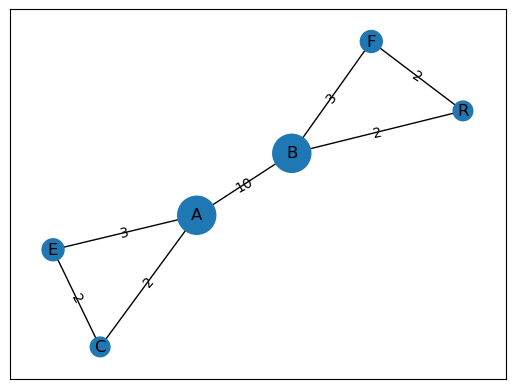

In [23]:
importance = dict(G.degree(weight="somedata"))
nodelist = list(importance.keys())
sizes = 50 * np.array([importance[key] for key in nodelist])
nx.draw_networkx_edge_labels(G, positions, edge_data)
nx.draw_networkx(G, positions, nodelist=nodelist, node_size=sizes)

 This notion can be used to `prune` a graph and detect communities. Starting from a graph, the Girvan Newman algorithm loops over all edges and removes the "most important edge" at each iteration until no edges are left. The obtained  result can be thought of as a "tree".

## Game of thrones communities

You are now ready to apply this concepts to a real dataset consisting of interactions between Game of thrones characters. Two characters (nodes) interact if they are mentioned within 15 consecutive words in a GOT book.

In [10]:
import pandas as pd
df = pd.read_csv("https://aiteachings.github.io/NYU-AI-Fall23/static_files/data/got/asoiaf-book1-edges.csv")
df

,Source,Target,Type,weight,book
0,Addam-Marbrand,Jaime-Lannister,Undirected,3,1
1,Addam-Marbrand,Tywin-Lannister,Undirected,6,1
2,Aegon-I-Targaryen,Daenerys-Targaryen,Undirected,5,1
3,Aegon-I-Targaryen,Eddard-Stark,Undirected,4,1
4,Aemon-Targaryen-(Maester-Aemon),Alliser-Thorne,Undirected,4,1
...,...,...,...,...,...
679,Tyrion-Lannister,Willis-Wode,Undirected,4,1
680,Tyrion-Lannister,Yoren,Undirected,10,1
681,Tywin-Lannister,Varys,Undirected,4,1
682,Tywin-Lannister,Walder-Frey,Undirected,8,1


In [25]:
def got_graph(book_id):
    df = pd.read_csv(f"https://aiteachings.github.io/NYU-AI-Fall23/static_files/data/got/asoiaf-book{book_id}-edges.csv")
    df["weight_inv"] = 1/df.weight * 1000.
    graph = nx.from_pandas_edgelist(df, source='Source', target='Target', edge_attr=['weight', 'weight_inv'])
    return graph

graph = got_graph(1)

We create a graph from this edges datasets:

In [12]:
graph.edges

EdgeView([('Addam-Marbrand', 'Jaime-Lannister'), ('Addam-Marbrand', 'Tywin-Lannister'), ('Jaime-Lannister', 'Aerys-II-Targaryen'), ('Jaime-Lannister', 'Barristan-Selmy'), ('Jaime-Lannister', 'Brynden-Tully'), ('Jaime-Lannister', 'Catelyn-Stark'), ('Jaime-Lannister', 'Cersei-Lannister'), ('Jaime-Lannister', 'Eddard-Stark'), ('Jaime-Lannister', 'Edmure-Tully'), ('Jaime-Lannister', 'Galbart-Glover'), ('Jaime-Lannister', 'Gregor-Clegane'), ('Jaime-Lannister', 'Harys-Swyft'), ('Jaime-Lannister', 'Joffrey-Baratheon'), ('Jaime-Lannister', 'Jon-Arryn'), ('Jaime-Lannister', 'Jory-Cassel'), ('Jaime-Lannister', 'Kevan-Lannister'), ('Jaime-Lannister', 'Loras-Tyrell'), ('Jaime-Lannister', 'Lysa-Arryn'), ('Jaime-Lannister', 'Petyr-Baelish'), ('Jaime-Lannister', 'Renly-Baratheon'), ('Jaime-Lannister', 'Rickard-Karstark'), ('Jaime-Lannister', 'Robb-Stark'), ('Jaime-Lannister', 'Robert-Baratheon'), ('Jaime-Lannister', 'Rodrik-Cassel'), ('Jaime-Lannister', 'Sandor-Clegane'), ('Jaime-Lannister', 'Sansa-S

In [32]:
# importance = dict(graph.degree(weight="somedata"))
# nodelist = list(importance.keys())
# sizes = 50 * np.array([importance[key] for key in nodelist])
# positions = nx.spring_layout(graph, weight="somedata")
# nx.draw_networkx_edge_labels(graph, positions, edge_data)
# nx.draw_networkx_edge_labels(graph, positions, nodelist=nodelist, node_size=sizes)

### Question 5:
Find the top 10 important characters.

_Tip: Find a smart way to sort a dictionary by looking up the extra args of `sorted`_

In [18]:
# We use weight to find the importance of the characters.

In [145]:
#importance = dict(graph.degree(weight="weight"))
graph=got_graph(1)
importance = dict(sorted(graph.degree(weight="weight"), key=lambda x: x[1], reverse=True))
nodelist = list(importance.keys())
top_10_characters=nodelist[:10]

#top_10_characters = sorted(importance, key=importance.get, reverse=True)[:10]

print("Top 10 Important Characters:")
for character in top_10_characters:
    print(f"{character}: {importance[character]}")
   

Top 10 Important Characters:
Eddard-Stark: 1284
Robert-Baratheon: 941
Jon-Snow: 784
Tyrion-Lannister: 650
Sansa-Stark: 545
Bran-Stark: 531
Catelyn-Stark: 520
Robb-Stark: 516
Daenerys-Targaryen: 443
Arya-Stark: 430


### Question 6:
Visualize the graph of the top 10 important characters.

_Tip: Create a subgraph_.

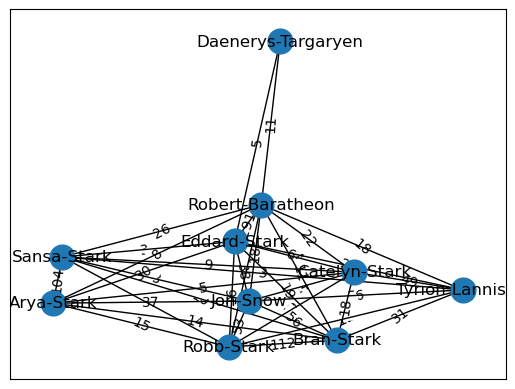

In [146]:
# nodelist = list(importance.keys())
# nodelist_10=nodelist[:10]
graph=got_graph(1)
subgraph = graph.subgraph(top_10_characters)
positions = nx.spring_layout(subgraph)

#print(len(nodelist)) = 317 so i made this my node_size


edge_data = nx.get_edge_attributes(subgraph, "weight")
nx.draw_networkx_edge_labels(subgraph, positions, edge_data)

nx.draw_networkx(subgraph, positions, node_size=317)
plt.show()

### Question 7
Read the dataset of the five books. Does this top 10 evolve as expected from the series ?

In [138]:
# This is an inefficient way to find the top 10 for each book so please look at the next code block
# graph1 = got_graph(1)
# graph2 = got_graph(2)
# graph3 = got_graph(3)
# graph4 = got_graph(4)
# graph5 = got_graph(5)

# importance = dict(graph1.degree(weight="weight"))

# top_10_characters = sorted(importance, key=importance.get, reverse=True)[:10]

# print("Top 10 Important Characters:")
# for character in top_10_characters:
#     print(f"{character}: {importance[character]}")
    
# print()

# importance = dict(graph2.degree(weight="weight"))

# top_10_characters = sorted(importance, key=importance.get, reverse=True)[:10]

# print("Top 10 Important Characters:")
# for character in top_10_characters:
#     print(f"{character}: {importance[character]}")
    
# print()

# importance = dict(graph3.degree(weight="weight"))

# top_10_characters = sorted(importance, key=importance.get, reverse=True)[:10]

# print("Top 10 Important Characters:")
# for character in top_10_characters:
#     print(f"{character}: {importance[character]}")
    
# print()

# importance = dict(graph4.degree(weight="weight"))

# top_10_characters = sorted(importance, key=importance.get, reverse=True)[:10]

# print("Top 10 Important Characters:")
# for character in top_10_characters:
#     print(f"{character}: {importance[character]}")
    
# print()
# importance = dict(graph5.degree(weight="weight"))

# top_10_characters = sorted(importance, key=importance.get, reverse=True)[:10]

# print("Top 10 Important Characters:")
# for character in top_10_characters:
#     print(f"{character}: {importance[character]}")

In [117]:
for book_id in range(1, 6):
    graph = got_graph(book_id)
    importance = dict(graph.degree(weight="weight"))

    top_10_characters = sorted(importance, key=importance.get, reverse=True)[:10]

    print(f'Top 10 Important Characters in Book {book_id}')
    
    for character in top_10_characters:
        print(f"{character}: {importance[character]}")
    
    print()
    

Top 10 Important Characters in Book 1
Eddard-Stark: 1284
Robert-Baratheon: 941
Jon-Snow: 784
Tyrion-Lannister: 650
Sansa-Stark: 545
Bran-Stark: 531
Catelyn-Stark: 520
Robb-Stark: 516
Daenerys-Targaryen: 443
Arya-Stark: 430

Top 10 Important Characters in Book 2
Tyrion-Lannister: 829
Joffrey-Baratheon: 629
Cersei-Lannister: 515
Bran-Stark: 486
Stannis-Baratheon: 461
Arya-Stark: 424
Jon-Snow: 360
Renly-Baratheon: 357
Robb-Stark: 344
Catelyn-Stark: 320

Top 10 Important Characters in Book 3
Tyrion-Lannister: 782
Jon-Snow: 756
Joffrey-Baratheon: 598
Jaime-Lannister: 563
Sansa-Stark: 532
Robb-Stark: 486
Arya-Stark: 442
Samwell-Tarly: 413
Cersei-Lannister: 363
Catelyn-Stark: 325

Top 10 Important Characters in Book 4
Cersei-Lannister: 783
Jaime-Lannister: 558
Tommen-Baratheon: 284
Margaery-Tyrell: 274
Brienne-of-Tarth: 258
Samwell-Tarly: 234
Tyrion-Lannister: 158
Petyr-Baelish: 151
Arianne-Martell: 150
Sansa-Stark: 147

Top 10 Important Characters in Book 5
Jon-Snow: 761
Daenerys-Targaryen: 

In [ ]:
# Question: Does this top 10 evolve as expected from the series ?
# I have no knowledge of GOT or any of the characters but assuming certain characters die, 
# the top 10 evolves to reflect the ending of certain characters as they no longer appear in the top 10 list.

### Question 8
Repeat question 6-7 but for the betweeness-centrality score. Does it make sense to use `weight` here ?

In [123]:
# top_10_betweenness_evolution = {}

# for book_id in range(1, 6):
#     graph = got_graph(book_id)

#     betweenness_centrality = nx.betweenness_centrality(graph, weight='weight_inv', normalized=True)

#     top_10_betweenness_characters = sorted(betweenness_centrality, key=betweenness_centrality.get, reverse=True)[:10]

#     top_10_betweenness_evolution[f'Book {book_id}'] = top_10_betweenness_characters

# # Print the evolution of the top 10 characters based on betweenness centrality across the series
# for book, characters in top_10_betweenness_evolution.items():
#     print()
#     print(f'Top 10 Characters in {book} based on Betweenness Centrality: {characters}')
    
#     nodelist = list(importance.keys())
#     nodelist_10=nodelist[:10]

#     subgraph = graph.subgraph(nodelist_10)
#     positions = nx.spring_layout(subgraph)

# #print(len(nodelist)) = 317 so i made this my node_size


#     edge_data = nx.get_edge_attributes(subgraph, "weight")
#     nx.draw_networkx_edge_labels(subgraph, positions, edge_data)

#     nx.draw_networkx(subgraph, positions, node_size=317)
#     plt.show()

Top 10 Characters in Book 1 based on Betweenness Centrality: ['Stannis-Baratheon', 'Tyrion-Lannister', 'Jon-Snow', 'Robert-Baratheon', 'Daenerys-Targaryen', 'Jon-Connington', 'Theon-Greyjoy', 'Cersei-Lannister', 'Quentyn-Martell', 'Asha-Greyjoy']

Top 10 Characters in Book 1 based on Betweenness Centrality: ['Eddard-Stark', 'Catelyn-Stark', 'Jon-Snow', 'Robert-Baratheon', 'Tyrion-Lannister', 'Daenerys-Targaryen', 'Bran-Stark', 'Robb-Stark', 'Arya-Stark', 'Sansa-Stark']

Top 10 Characters in Book 2 based on Betweenness Centrality: ['Eddard-Stark', 'Catelyn-Stark', 'Jon-Snow', 'Robert-Baratheon', 'Tyrion-Lannister', 'Daenerys-Targaryen', 'Bran-Stark', 'Robb-Stark', 'Arya-Stark', 'Sansa-Stark']

Top 10 Characters in Book 3 based on Betweenness Centrality: ['Eddard-Stark', 'Catelyn-Stark', 'Jon-Snow', 'Robert-Baratheon', 'Tyrion-Lannister', 'Daenerys-Targaryen', 'Bran-Stark', 'Robb-Stark', 'Arya-Stark', 'Sansa-Stark']

Top 10 Characters in Book 4 based on Betweenness Centrality: ['Eddard-S

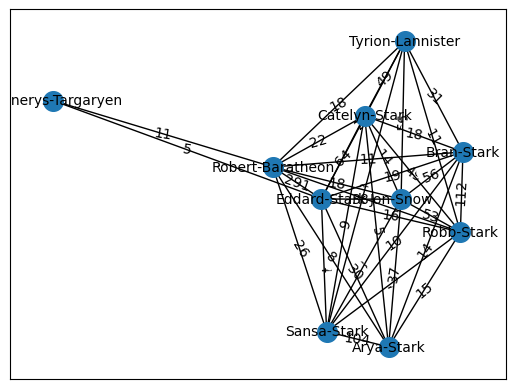

In [159]:
graph = got_graph(1)

# betweenness_centrality = nx.betweenness_centrality(graph, weight='weight_inv', normalized=True)

# top_10_betweenness_characters = sorted(betweenness_centrality, key=betweenness_centrality.get, reverse=True)[:10]

betweenness_centrality = dict(sorted(nx.betweenness_centrality(graph, weight="weight_inv").items(), key=lambda x:x[1], reverse=True))

print(f'Top 10 Characters in Book 1 based on Betweenness Centrality: {top_10_betweenness_characters}')
    

nodelist = list(betweenness_centrality.keys())

subgraph = graph.subgraph(nodelist[:10])

positions = nx.spring_layout(subgraph, weight="weight")
edge_data = nx.get_edge_attributes(subgraph, "weight")

nx.draw_networkx_edge_labels(subgraph, positions, edge_data)
nx.draw_networkx(subgraph, positions, with_labels=True, font_size=10, node_size=200)


for book_id in range(1, 6):
    graph = got_graph(book_id)

    #betweenness_centrality = nx.betweenness_centrality(graph, weight='weight_inv', normalized=True)

    top_10_betweenness_characters = sorted(betweenness_centrality, key=betweenness_centrality.get, reverse=True)[:10]

    top_10_betweenness_evolution[f'Book {book_id}'] = top_10_betweenness_characters

# Print the evolution of the top 10 characters based on betweenness centrality across the series
for book, characters in top_10_betweenness_evolution.items():
    print()
    print(f'Top 10 Characters in {book} based on Betweenness Centrality: {characters}')
    
    nodelist = list(importance.keys())
    nodelist_10=nodelist[:10]

    subgraph = graph.subgraph(nodelist_10)
    positions = nx.spring_layout(subgraph)

#print(len(nodelist)) = 317 so i made this my node_size


#     edge_data = nx.get_edge_attributes(subgraph, "weight")
#     nx.draw_networkx_edge_labels(subgraph, positions, edge_data)

#     nx.draw_networkx(subgraph, positions, node_size=317)
#     plt.show()

In [ ]:
'''
Answer: No it does not make sense to use weight here. We should use weight_inv.
This is because betweenness centrality is all about finding a character that connects two groups of people
so their importance is significance because of the role they play in this connection.
Using weight_inv allows us to prioritize edges with lower weights. This is important because a character with 
a low weight might connect two groups of people meaning their importance is very significant so their importance
will increase in the inverse.
'''

### Question 9
Run the girvan newman algorithm and visualize the graph of each community (top 5 important characters of each community). Do the communities make sense from a story perspective ?

In [63]:
from networkx.algorithms.community.centrality import girvan_newman


Top 5 Important Characters in Book 1:

Community 1:
Eddard-Stark: 1275
Robert-Baratheon: 911
Jon-Snow: 784
Tyrion-Lannister: 650
Sansa-Stark: 545


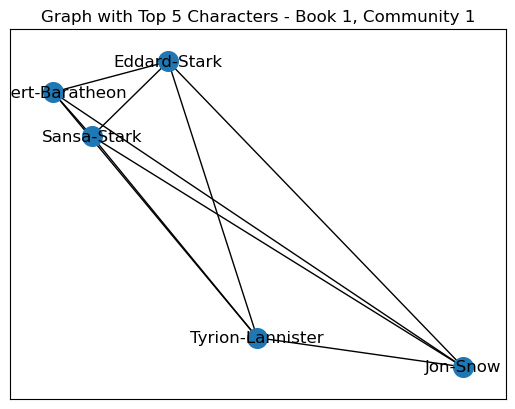


Community 2:
Daenerys-Targaryen: 418
Drogo: 253
Jorah-Mormont: 146
Viserys-Targaryen: 93
Irri: 81


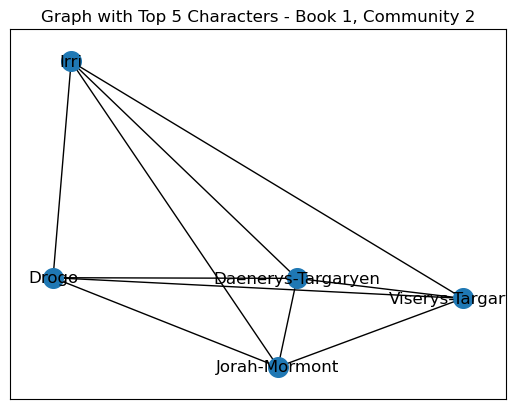


Top 5 Important Characters in Book 2:

Community 1:
Tyrion-Lannister: 829
Joffrey-Baratheon: 629
Cersei-Lannister: 515
Bran-Stark: 486
Stannis-Baratheon: 461


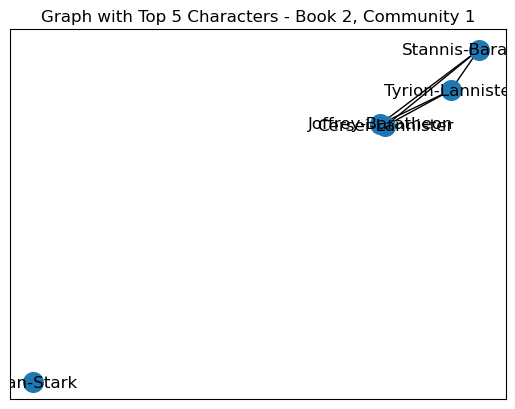


Community 2:
Daenerys-Targaryen: 129
Jorah-Mormont: 57
Jhogo: 33
Aggo: 33
Pyat-Pree: 24


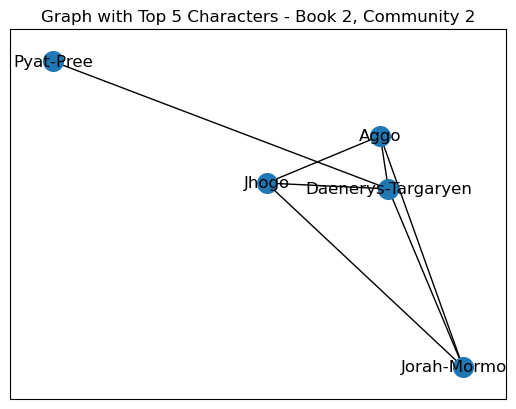


Top 5 Important Characters in Book 3:

Community 1:
Tyrion-Lannister: 782
Jon-Snow: 756
Joffrey-Baratheon: 598
Jaime-Lannister: 563
Sansa-Stark: 532


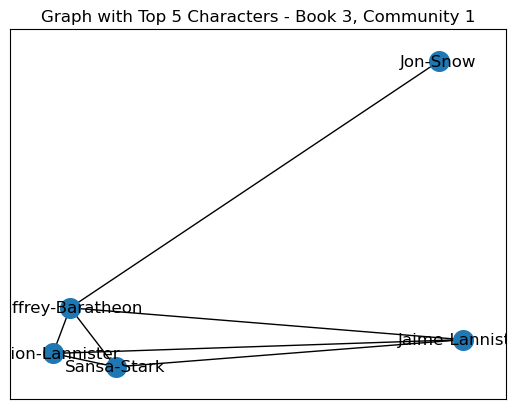


Community 2:
Daenerys-Targaryen: 274
Jorah-Mormont: 126
Belwas: 94
Arstan: 83
Jhiqui: 48


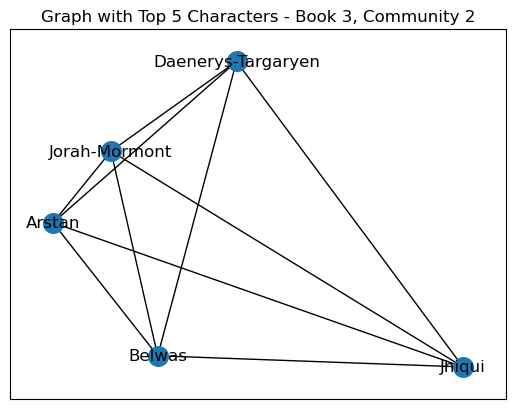


Top 5 Important Characters in Book 4:

Community 1:
Cersei-Lannister: 783
Jaime-Lannister: 558
Tommen-Baratheon: 284
Margaery-Tyrell: 274
Brienne-of-Tarth: 258


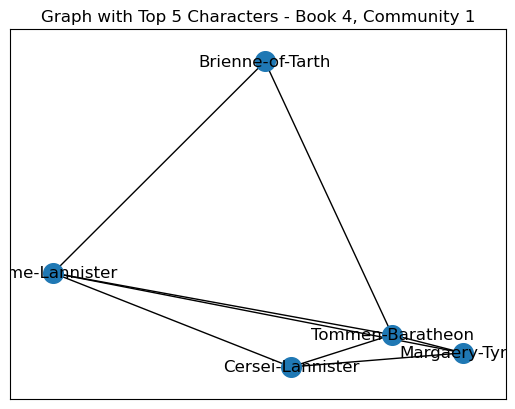


Community 2:
Victarion-Greyjoy: 142
Euron-Greyjoy: 136
Aeron-Greyjoy: 122
Asha-Greyjoy: 68
Balon-Greyjoy: 65


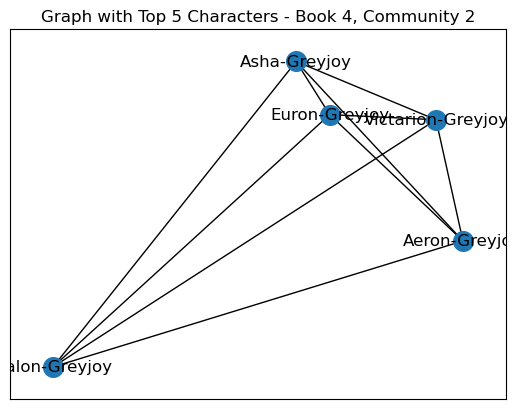


Top 5 Important Characters in Book 5:

Community 1:
Daenerys-Targaryen: 721
Tyrion-Lannister: 451
Hizdahr-zo-Loraq: 292
Barristan-Selmy: 270
Quentyn-Martell: 231


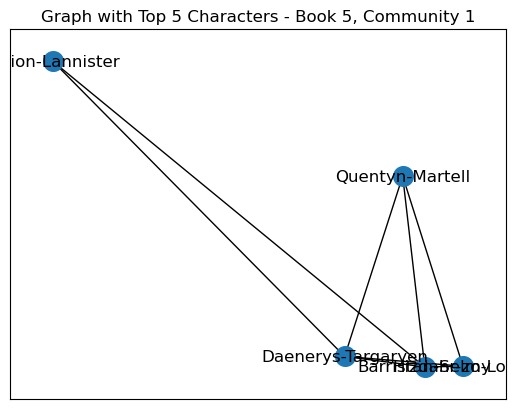


Community 2:
Jon-Snow: 761
Stannis-Baratheon: 388
Theon-Greyjoy: 307
Ramsay-Snow: 185
Bran-Stark: 161


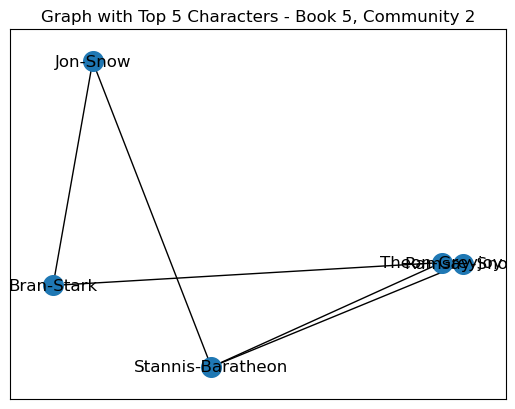


Communities in Book 1: ({'Areo-Hotah', 'Jhogo', 'Moqorro', 'Pycelle', 'Aegon-I-Targaryen', 'Xaro-Xhoan-Daxos', 'Steelskin', 'Jorah-Mormont', 'Aerys-II-Targaryen', 'Wylis-Manderly', 'Kasporio', 'Myles-Toyne', 'Hizdahr-zo-Loraq', 'Osney-Kettleblack', 'Tyene-Sand', 'Penny', 'Ezzara', 'Boros-Blount', 'Cletus-Yronwood', 'Yurkhaz-zo-Yunzak', 'Groleo', 'Randyll-Tarly', 'Qyburn', 'Caleotte', 'Viserys-Targaryen', 'Denzo-Dhan', 'Caggo', 'Tyrion-Lannister', 'Lyanna-Stark', 'Meryn-Trant', 'Symon-Stripeback', 'Meris', 'Daenerys-Targaryen', 'Shrouded-Lord', 'Qavo-Nogarys', 'Jonos-Bracken', 'Drogo', 'Black-Balaq', 'Gerris-Drinkwater', 'Nyessos-Vhassar', 'Daeron-II-Targaryen', 'Dunsen', 'Draqaz', 'Kerwin', 'Benerro', 'Tommen-Baratheon', 'Nymeria-Sand', 'Rafford', 'Morgo', 'Balon-Swann', 'Doran-Martell', 'Khrazz', 'Tattered-Prince', 'Archibald-Yronwood', 'Ralf-(Limper)', 'Rhaenys-Targaryen-(daughter-of-Rhaegar)', 'Unella', 'Jhiqui', 'Arys-Oakheart', 'Skahaz-mo-Kandaq', 'Barristan-Selmy', 'Hero', 'Wido

In [158]:
import matplotlib.pyplot as plt

for book_id in range(1, 6):
    graph = got_graph(book_id)
    all_communities = []

    find_communities = girvan_newman(graph)
    communities = next(find_communities)

    all_communities.append(communities)

    pos = nx.spring_layout(graph)

    print(f"\nTop 5 Important Characters in Book {book_id}:")

    for community_id, community in enumerate(communities, start=1):
        community_graph = graph.subgraph(community)
        
        importance = dict(community_graph.degree(weight="weight"))
        top_5_characters = sorted(importance, key=importance.get, reverse=True)[:5]

        print(f"\nCommunity {community_id}:")
        for character in top_5_characters:
            print(f"{character}: {importance[character]}")

        top_5_graph = community_graph.subgraph(top_5_characters)

        plt.figure()
        nx.draw_networkx_nodes(top_5_graph, pos, node_size=200)
        nx.draw_networkx_edges(top_5_graph, pos)
        nx.draw_networkx_labels(top_5_graph, pos)

        plt.title(f"Graph with Top 5 Characters - Book {book_id}, Community {community_id}")
        plt.show()

# This prints all the communities
for i, communities in enumerate(all_communities, start=1):
    print()
    print(f'Communities in Book {i}: {communities}')

